## **3. Data Analysis : Phases Analysis**
> ####  _Sub-Analytical Question:_
> #### **What are the trends in solar energy adoption across the conflict cycle—pre-conflict, active conflict, and post-conflict periods—in conflict-affected countries?**

After conducting initial data exploration in [EDA 1](https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/blob/main/3_data_exploration/IRENA_ONG_explore_1.ipynb) and [EDA 2](https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/blob/main/3_data_exploration/IRENA_ONG_explore_2.ipynb), and summarizing key findings in the [Exploration README](https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/blob/main/3_data_exploration/README.md), this analysis phase builds on that foundation by focusing on trends across the **three conflict periods** — *pre-conflict*, *active conflict*, and *post-conflict*.

The goal is to investigate whether any **clear patterns emerge** in solar energy adoption among the 9 conflict-affected countries studied.



#### Summary of Previous Discoveries

* **Ukraine dominates the data** with over **8,000 MW by 2024**, nearly **30x** more than any other country.
* **Conflict strongly disrupts growth**: Most countries see capacity drops or stagnation during active conflict periods.
* **Solar growth happens in waves**:

  * Early growth (2004–2010)
  * Mid-phase adopters (2015–2018)
  * Late surge (2018–2022)
* **Growth is possible even in fragile states**: Yemen reached \~250 MW during conflict, Sudan grew steadily to \~100 MW.

> **Key Insight**: *While conflict hinders development, short windows of stability allow for rapid solar expansion. Growth patterns become volatile when conflict resumes.*


#### Focus of This Analysis

This data analysis phase builds on the above insights by examining solar PV growth through the lens of **three conflict phases**—**pre-conflict**, **active conflict**, and **post-conflict**—across **nine countries**:
**Ukraine, Yemen, Sudan, Ethiopia, Libya, Syria, Afghanistan, Iraq, and South Sudan**.

The goal is to:

* Compare how solar development varies by **conflict phase**
* Identify **shared or divergent patterns** across countries
* Explore **exceptions** (e.g., growth during conflict)
* Investigate the **volatility** and **recovery trajectories**


This structured investigation helps answer:
**To what extent does conflict interrupt solar development?**
**Which countries recover faster—and why?**
**Can meaningful infrastructure still be developed during war?**

The following sections use stacked bar charts, heatmaps, and comparative trend lines to dig deeper into these questions.


In [9]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Visualization settings
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")

In [10]:
# 2. Load Dataset

df = pd.read_excel(
    "../1_datasets/cleaned_data/ONG_conflictcountriesonly.xlsx",
    engine="openpyxl",
)

In [11]:
# 3. Quick Preview
print(df.head())
print("Shape of dataset:", df.shape)

   Region       Sub-region Country ISO3 code         RE or Non-RE  \
0  Africa  Northern Africa   Libya       LBY  Total Non-Renewable   
1  Africa  Northern Africa   Libya       LBY  Total Non-Renewable   
2  Africa  Northern Africa   Libya       LBY  Total Non-Renewable   
3  Africa  Northern Africa   Libya       LBY  Total Non-Renewable   
4  Africa  Northern Africa   Libya       LBY  Total Non-Renewable   

  Group Technology   Technology Sub-Technology        Producer Type  Year  \
0     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2000   
1     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2001   
2     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2002   
3     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2003   
4     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2004   

   Electricity Installed Capacity (MW) Conflict Phase  
0                                930.0   pre-conflict  
1         

In [12]:
# 14. SOLAR ENERGY DATAFRAME
solar_df = df[
    df["RE or Non-RE"].str.contains("Total Renewable", case=False, na=False)
    & df["Group Technology"].str.contains("Solar energy", case=False, na=False)
].copy()

solar_df.head()

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Conflict Phase
46,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2003,0.2,pre-conflict
47,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2004,0.7,pre-conflict
48,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2005,1.2,pre-conflict
49,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2006,1.7,pre-conflict
50,Africa,Northern Africa,Libya,LBY,Total Renewable,Solar energy,Solar photovoltaic,Off-grid Solar photovoltaic,Off-grid electricity,2007,2.2,pre-conflict


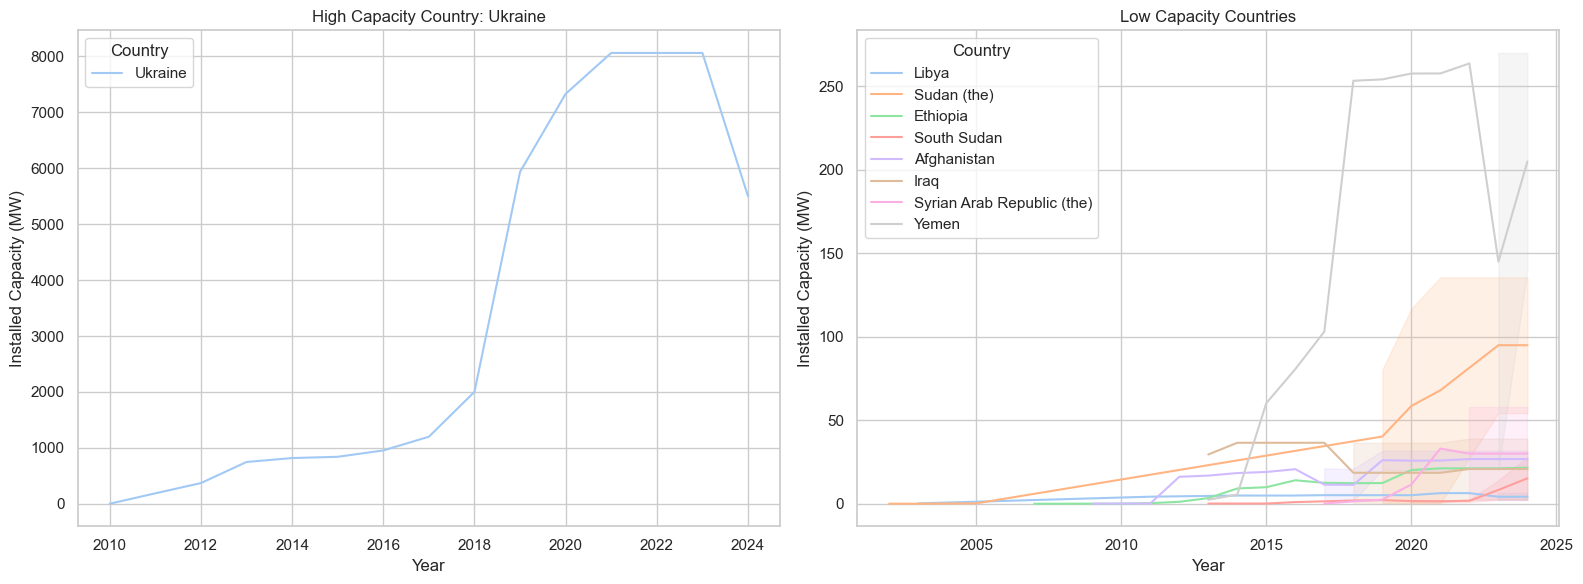

In [13]:
# 4. High vs Low Capacity
# Ukraine has much higher capacity than others, so we separate it
high_capacity_countries = ["Ukraine"]

# Getting all unique country names from our data
all_countries = solar_df["Country"].unique()

# Creating a list of countries that are NOT Ukraine (the low capacity ones)
low_capacity_countries = []
for country in all_countries:
    if country != "Ukraine":  # If it's not Ukraine
        low_capacity_countries.append(country)  # Add it to low capacity list

# Then creating two graphs side by side to see difference
fig, (left_graph, right_graph) = plt.subplots(1, 2, figsize=(16, 6))
# 1 = one row, 2 = two columns, figsize makes it wide enough for both

# The LEFT graph (for high capacity countries)
# Filter our data to only include Ukraine
ukraine_data = solar_df[solar_df["Country"] == "Ukraine"]

# Plotting Ukraine's data on the left graph
sns.lineplot(
    data=ukraine_data,
    x="Year",
    y="Electricity Installed Capacity (MW)",
    hue="Country",
    ax=left_graph,
)

# Adding labels to the left graph
left_graph.set_title("High Capacity Country: Ukraine")
left_graph.set_ylabel("Installed Capacity (MW)")
left_graph.set_xlabel("Year")

# The RIGHT graph (for low capacity countries)
# Filter our data to exclude Ukraine (keep all others)
other_countries_data = solar_df[solar_df["Country"] != "Ukraine"]

# Plotting all other countries 8 on the right graph
sns.lineplot(
    data=other_countries_data,
    x="Year",
    y="Electricity Installed Capacity (MW)",
    hue="Country",
    ax=right_graph,
)

# Add labels to the right graph
right_graph.set_title("Low Capacity Countries")
right_graph.set_ylabel("Installed Capacity (MW)")
right_graph.set_xlabel("Year")

plt.tight_layout()
plt.show()

# - Left graph: Ukraine's dramatic growth (large numbers)
# - Right graph: All other countries (smaller numbers, but now visible!)

**Key Finding:**  
 _Ukraine's solar energy_ capacity is dramatically higher than all other countries in the dataset, with over _8,000 MW_ by 2024 compared to less than _250 MW_ for any other country.   
 
 This 30-40x difference is so extreme that Ukraine must be analyzed separately from other countries (Libya, Syria, Sudan, Ethiopia, South Sudan, Afghanistan, Iraq, Yemen) to make meaningful comparisons, as Ukraine's exponential growth from 2016-2022 completely dominates the scale and obscures patterns in the remaining countries.

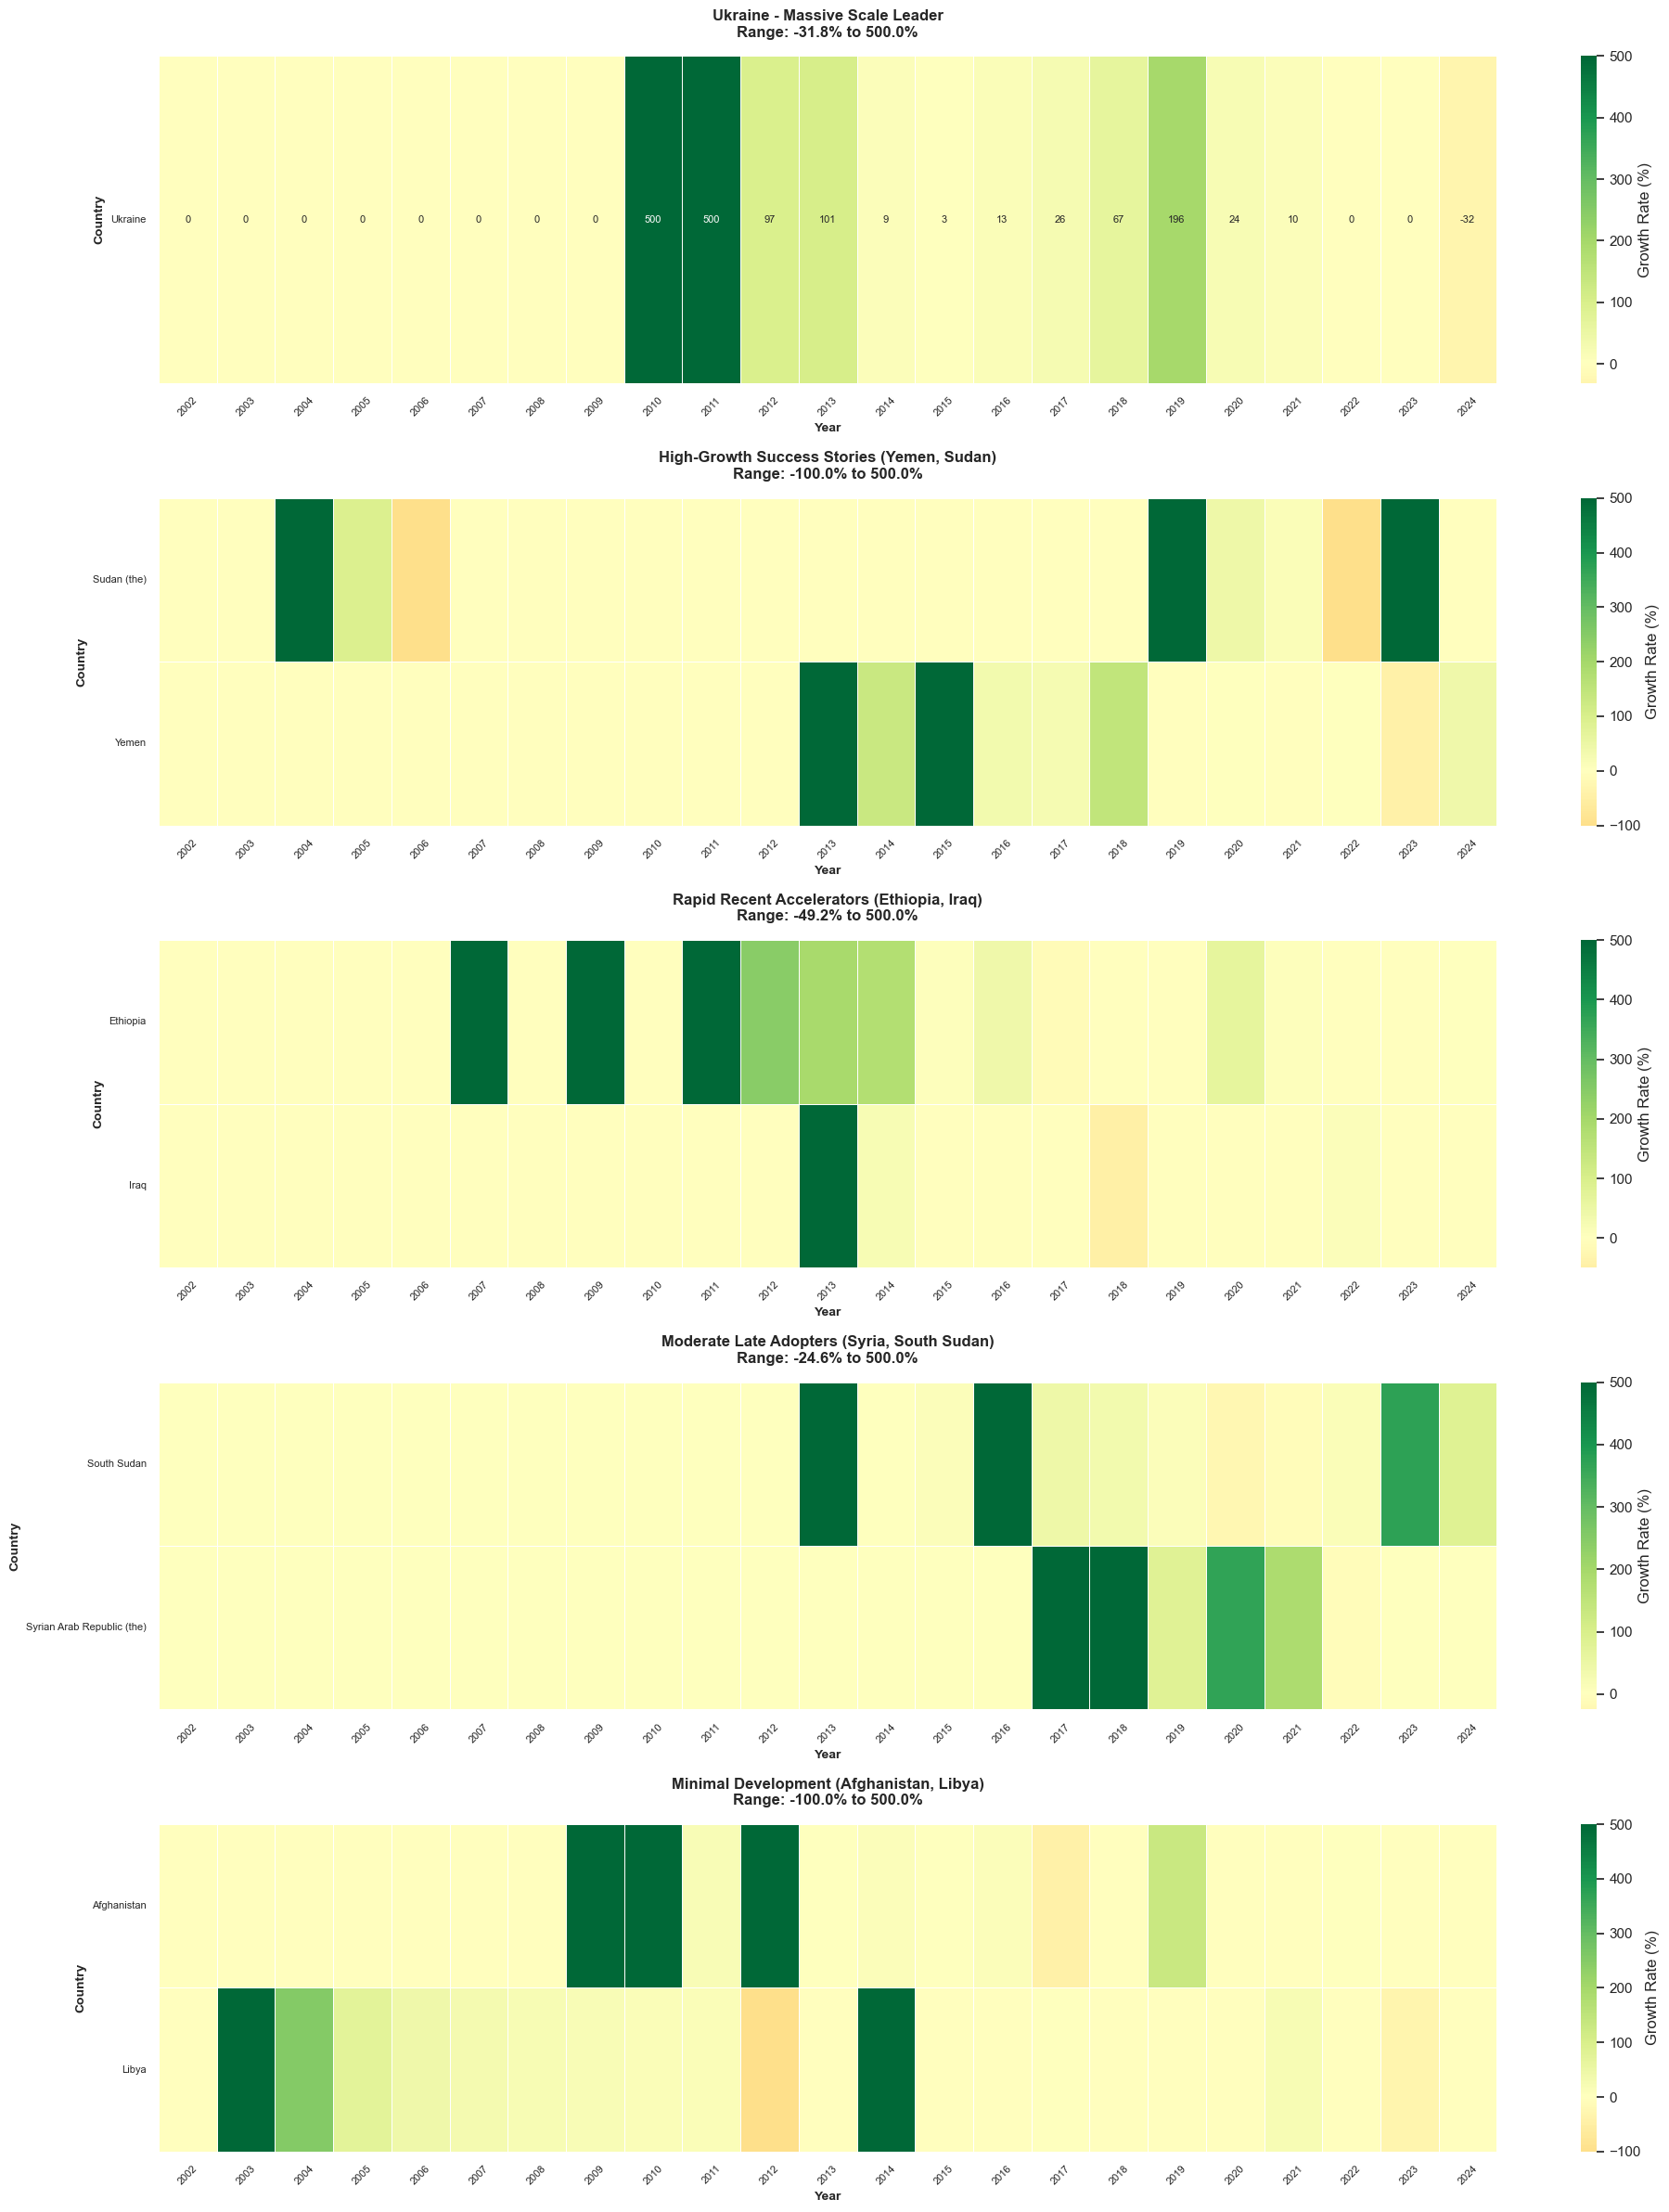

In [14]:
# 5. Heat map for countries with similar pattern
# Step 1: Prepare the data for heatmap format
heatmap_data = solar_df.pivot_table(
    index="Country",
    columns="Year",
    values="Electricity Installed Capacity (MW)",
    fill_value=0,
)


# Step 2: Calculate year-over-year growth rates
def calculate_growth_rates(data):
    growth_data = data.copy()
    growth_data.iloc[:, 0] = 0  # First year = 0% growth
    for country in growth_data.index:
        for i in range(1, len(growth_data.columns)):
            prev_year = growth_data.columns[i - 1]
            curr_year = growth_data.columns[i]
            prev_capacity = data.loc[country, prev_year]
            curr_capacity = data.loc[country, curr_year]
            if prev_capacity == 0:
                growth_data.loc[country, curr_year] = 500 if curr_capacity > 0 else 0
            else:
                growth_rate = ((curr_capacity - prev_capacity) / prev_capacity) * 100
                growth_data.loc[country, curr_year] = min(max(growth_rate, -100), 500)
    return growth_data


all_growth_data = calculate_growth_rates(heatmap_data)

# Step 3: Group countries by similar patterns
ukraine_growth = all_growth_data[all_growth_data.index == "Ukraine"]
group2_growth = all_growth_data[all_growth_data.index.isin(["Yemen", "Sudan (the)"])]
group3_growth = all_growth_data[all_growth_data.index.isin(["Ethiopia", "Iraq"])]
group4_growth = all_growth_data[
    all_growth_data.index.isin(["Syrian Arab Republic (the)", "South Sudan"])
]
group5_growth = all_growth_data[all_growth_data.index.isin(["Afghanistan", "Libya"])]

# Step 4: Plot heatmaps
fig, axes = plt.subplots(5, 1, figsize=(20, 24))

heatmap_params = {
    "cmap": "RdYlGn",
    "center": 0,
    "linewidths": 0.5,
    "linecolor": "white",
    "square": False,
    "fmt": ".0f",
}

sns.heatmap(
    ukraine_growth,
    annot=True,
    annot_kws={"fontsize": 8},
    cbar_kws={"label": "Growth Rate (%)"},
    ax=axes[0],
    **heatmap_params,
)
axes[0].set_title(
    f"Ukraine - Massive Scale Leader\nRange: {ukraine_growth.min().min():.1f}% to {ukraine_growth.max().max():.1f}%",
    fontsize=12,
    fontweight="bold",
    pad=15,
)

sns.heatmap(
    group2_growth,
    annot=False,
    cbar_kws={"label": "Growth Rate (%)"},
    ax=axes[1],
    **heatmap_params,
)
axes[1].set_title(
    f"High-Growth Success Stories (Yemen, Sudan)\nRange: {group2_growth.min().min():.1f}% to {group2_growth.max().max():.1f}%",
    fontsize=12,
    fontweight="bold",
    pad=15,
)

sns.heatmap(
    group3_growth,
    annot=False,
    cbar_kws={"label": "Growth Rate (%)"},
    ax=axes[2],
    **heatmap_params,
)
axes[2].set_title(
    f"Rapid Recent Accelerators (Ethiopia, Iraq)\nRange: {group3_growth.min().min():.1f}% to {group3_growth.max().max():.1f}%",
    fontsize=12,
    fontweight="bold",
    pad=15,
)

sns.heatmap(
    group4_growth,
    annot=False,
    cbar_kws={"label": "Growth Rate (%)"},
    ax=axes[3],
    **heatmap_params,
)
axes[3].set_title(
    f"Moderate Late Adopters (Syria, South Sudan)\nRange: {group4_growth.min().min():.1f}% to {group4_growth.max().max():.1f}%",
    fontsize=12,
    fontweight="bold",
    pad=15,
)

sns.heatmap(
    group5_growth,
    annot=False,
    cbar_kws={"label": "Growth Rate (%)"},
    ax=axes[4],
    **heatmap_params,
)
axes[4].set_title(
    f"Minimal Development (Afghanistan, Libya)\nRange: {group5_growth.min().min():.1f}% to {group5_growth.max().max():.1f}%",
    fontsize=12,
    fontweight="bold",
    pad=15,
)

# Customize all axes
for ax in axes:
    ax.set_xlabel("Year", fontsize=10, fontweight="bold")
    ax.set_ylabel("Country", fontsize=10, fontweight="bold")
    ax.tick_params(axis="x", rotation=45, labelsize=8)
    ax.tick_params(axis="y", rotation=0, labelsize=8)

plt.tight_layout()
plt.show()

**Key Findings:**

 **When Countries Started Building Solar Power**

 **Time Periods**
1. **2009-2010**: Ukraine and Afghanistan started big projects
2. **2004-2006**: Sudan began building solar power
3. **2018-2022**: Yemen and Iraq got serious about solar
4. **2020-2025**: Syria and South Sudan joined in recently

 **How Fast They Grew**

 **Growth Speed**
- **500% growth**: Means they built A LOT very quickly (like going from 1 to 5 solar farms)
- **Steady vs. Stop-and-Go**: Ukraine and Yemen kept building consistently; others built in short bursts then stopped
- **Negative growth**: Sometimes they had less solar power than before (maybe some broke down)

 **Three Waves of Countries**

 **The Waves**
1. **Early Starters (2004–2010)**: Sudan, Ukraine, Afghanistan & Ethiopia went first  
→ _These countries had the most time to grow solar but only Ukraine sustained it._
2. **Middle Joiners (2015–2018):** Syria, South Sudan joined later  
→ _Late to start, with minimal long-term growth._  
3.**Recent Joiners (2018–2025):** Yemen, Iraq are newest  
→ _Sharp increases in short time; future potential._
1. **Barely Tried:** Libya hardly built any solar  
→ _Very low adoption overall._

 **Main Point**
All countries can grow solar power really fast when they start (500% growth), but most countries only did it for a short time and then stopped. Ukraine was the only one that kept building solar power for many years, which is why they have so much more than everyone else.

Conflict Phase
active-conflict    577.227956
pre-conflict        51.992963
post-conflict       15.525667
Name: Electricity Installed Capacity (MW), dtype: float64


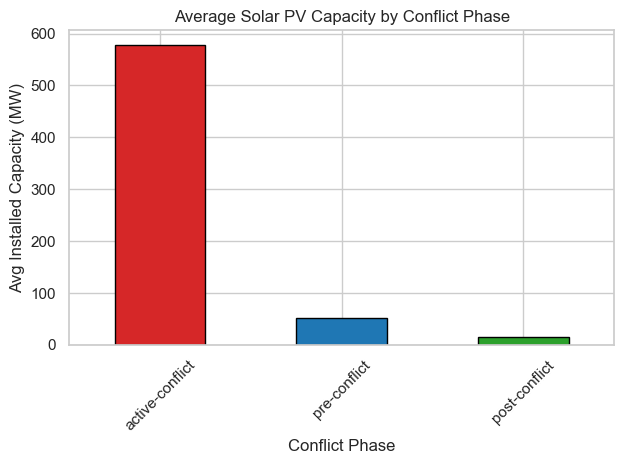

In [15]:
# 3. Average Solar Energy Capacity by Conflict Phase

avg_capacity_by_phase = (
    solar_df.groupby("Conflict Phase")["Electricity Installed Capacity (MW)"]
    .mean()
    .sort_values(ascending=False)
)

print(avg_capacity_by_phase)


colors = {
    "pre-conflict": "#1f77b4",  # blue
    "active-conflict": "#d62728",  # red
    "post-conflict": "#2ca02c",  # green
    "transitional": "#ff7f0e",  # orange (if used)
}

# Plot
avg_capacity_by_phase.plot(
    kind="bar",
    color=[colors[phase] for phase in avg_capacity_by_phase.index],
    edgecolor="black",
)

plt.title("Average Solar PV Capacity by Conflict Phase")
plt.ylabel("Avg Installed Capacity (MW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

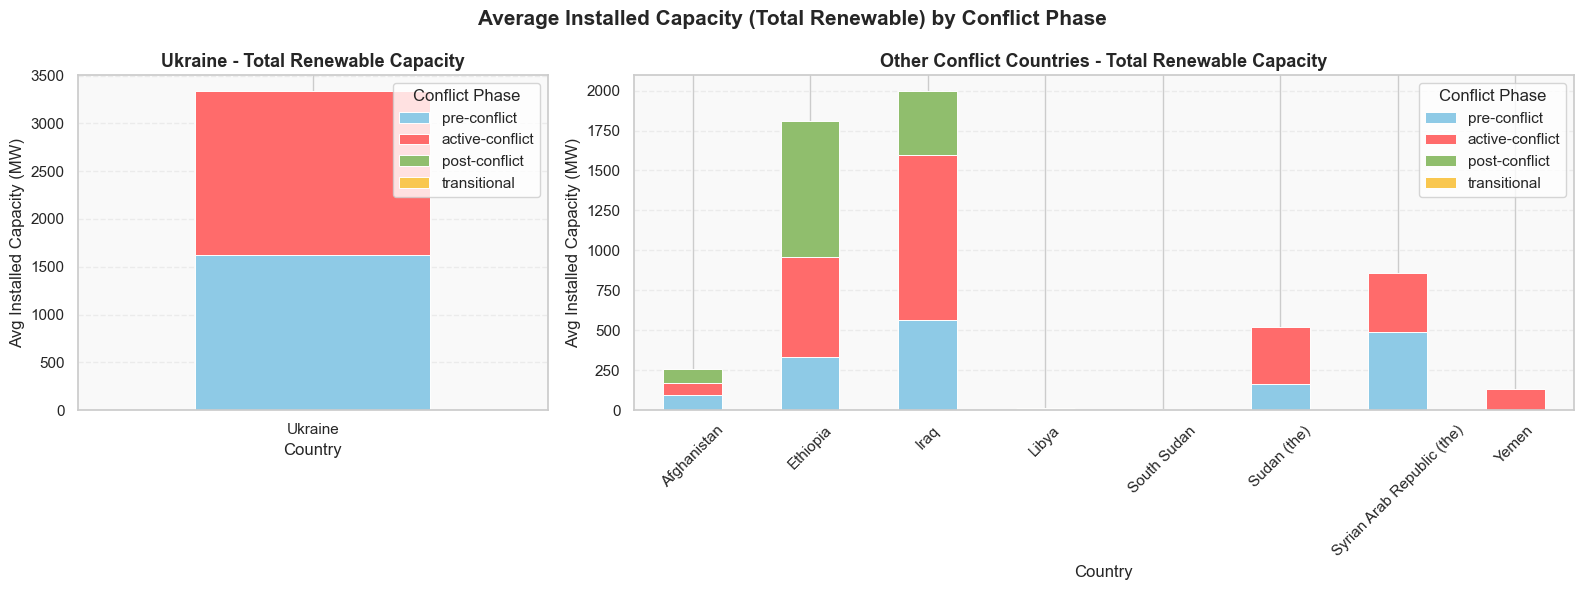

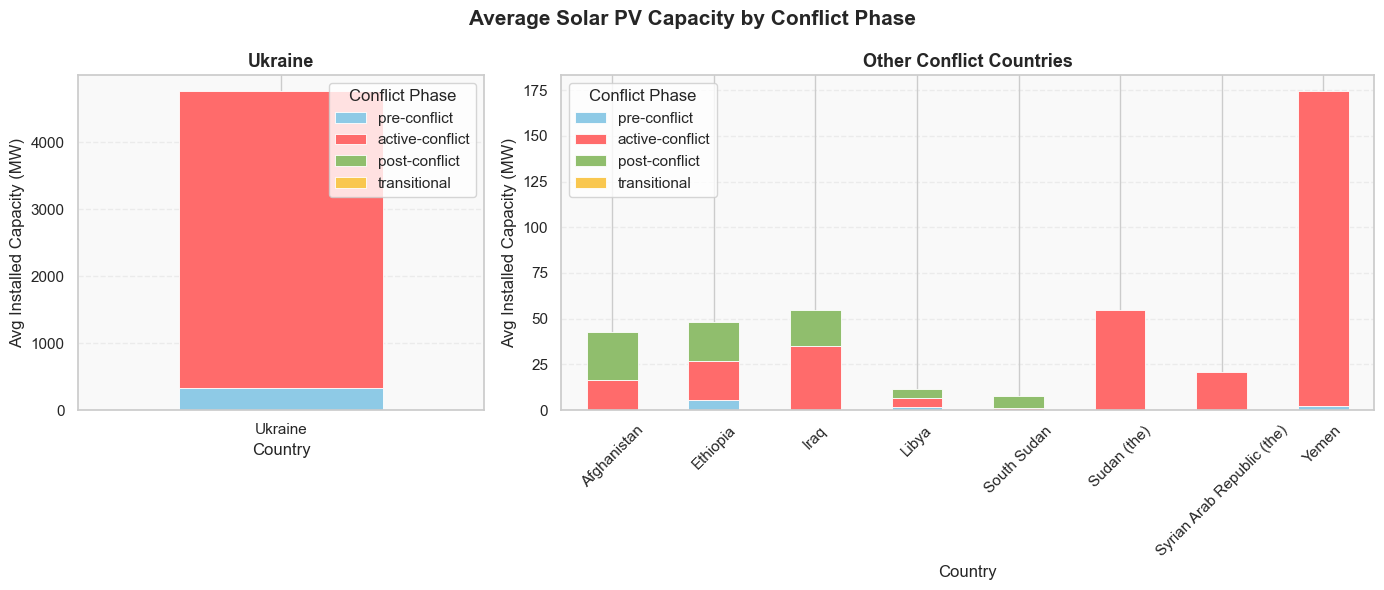

In [50]:
import matplotlib.pyplot as plt

# === Filter for Total Renewable energy only ===
total_renewable_df = df[df["RE or Non-RE"].str.lower() == "total renewable"]

# === Define consistent conflict phase color palette ===
colors = {
    "pre-conflict": "#8ecae6",
    "active-conflict": "#ff6b6b",
    "post-conflict": "#90be6d",
    "transitional": "#f9c74f",
}

# === Split into Ukraine and Others ===
ukraine_df = total_renewable_df[total_renewable_df["Country"] == "Ukraine"]
others_df = total_renewable_df[total_renewable_df["Country"] != "Ukraine"]

# === Group by Country and Conflict Phase ===
ukraine_grouped = (
    ukraine_df.groupby(["Country", "Conflict Phase"])[
        "Electricity Installed Capacity (MW)"
    ]
    .mean()
    .unstack(fill_value=0)
    .reindex(
        columns=["pre-conflict", "active-conflict", "post-conflict", "transitional"],
        fill_value=0,
    )
)

others_grouped = (
    others_df.groupby(["Country", "Conflict Phase"])[
        "Electricity Installed Capacity (MW)"
    ]
    .mean()
    .unstack(fill_value=0)
    .reindex(
        columns=["pre-conflict", "active-conflict", "post-conflict", "transitional"],
        fill_value=0,
    )
)

# === Plotting ===
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [1, 2]})

# Plot Ukraine
ukraine_grouped.plot(
    kind="bar",
    stacked=True,
    color=[colors[phase] for phase in ukraine_grouped.columns],
    edgecolor="white",
    linewidth=0.7,
    ax=axes[0],
)
axes[0].set_title("Ukraine - Total Renewable Capacity", fontsize=13, weight="bold")
axes[0].set_ylabel("Avg Installed Capacity (MW)")
axes[0].tick_params(axis="x", rotation=0)
axes[0].legend(title="Conflict Phase")
axes[0].grid(axis="y", linestyle="--", alpha=0.3)
axes[0].set_facecolor("#f9f9f9")

# Plot Other Countries
others_grouped.plot(
    kind="bar",
    stacked=True,
    color=[colors[phase] for phase in others_grouped.columns],
    edgecolor="white",
    linewidth=0.7,
    ax=axes[1],
)
axes[1].set_title(
    "Other Conflict Countries - Total Renewable Capacity", fontsize=13, weight="bold"
)
axes[1].set_ylabel("Avg Installed Capacity (MW)")
axes[1].tick_params(axis="x", rotation=45)
axes[1].legend(title="Conflict Phase")
axes[1].grid(axis="y", linestyle="--", alpha=0.3)
axes[1].set_facecolor("#f9f9f9")

# Overall Title
fig.suptitle(
    "Average Installed Capacity (Total Renewable) by Conflict Phase",
    fontsize=15,
    weight="bold",
)
plt.tight_layout()
plt.show()

# --
import matplotlib.pyplot as plt

# Define color palette
colors = {
    "pre-conflict": "#8ecae6",  # light blue
    "active-conflict": "#ff6b6b",  # coral red
    "post-conflict": "#90be6d",  # green
    "transitional": "#f9c74f",  # orange-yellow
}

# === Separate Ukraine and Others ===
ukraine_df = solar_df[solar_df["Country"] == "Ukraine"]
other_df = solar_df[solar_df["Country"] != "Ukraine"]

# === Group: Ukraine by phase ===
ukraine_avg = (
    ukraine_df.groupby(["Country", "Conflict Phase"])[
        "Electricity Installed Capacity (MW)"
    ]
    .mean()
    .unstack(fill_value=0)
    .reindex(
        columns=["pre-conflict", "active-conflict", "post-conflict", "transitional"]
    )
)

# === Group: Other countries by phase ===
other_grouped = (
    other_df.groupby(["Country", "Conflict Phase"])[
        "Electricity Installed Capacity (MW)"
    ]
    .mean()
    .unstack(fill_value=0)
    .reindex(
        columns=["pre-conflict", "active-conflict", "post-conflict", "transitional"]
    )
)

# === Plotting ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [1, 2]})

# --- Plot 1: Ukraine (stacked) ---
ukraine_avg.plot(
    kind="bar",
    stacked=True,
    color=[colors[phase] for phase in ukraine_avg.columns],
    edgecolor="white",
    linewidth=0.6,
    ax=axes[0],
)
axes[0].set_title("Ukraine", fontsize=13, weight="bold")
axes[0].set_ylabel("Avg Installed Capacity (MW)")
axes[0].tick_params(axis="x", rotation=0)
axes[0].legend(title="Conflict Phase")
axes[0].grid(axis="y", linestyle="--", alpha=0.3)
axes[0].set_facecolor("#f9f9f9")

# --- Plot 2: Other Conflict Countries (stacked) ---
other_grouped.plot(
    kind="bar",
    stacked=True,
    color=[colors[phase] for phase in other_grouped.columns],
    edgecolor="white",
    linewidth=0.6,
    ax=axes[1],
)
axes[1].set_title("Other Conflict Countries", fontsize=13, weight="bold")
axes[1].set_ylabel("Avg Installed Capacity (MW)")
axes[1].tick_params(axis="x", rotation=45)
axes[1].legend(title="Conflict Phase")
axes[1].grid(axis="y", linestyle="--", alpha=0.3)
axes[1].set_facecolor("#f9f9f9")

# Overall layout
fig.suptitle("Average Solar PV Capacity by Conflict Phase", fontsize=15, weight="bold")
plt.tight_layout()
plt.show()